# Market Research: Evaluating Market Demand for Smart Pen
The objective of this project is to gain experience with working with secondary data. This notebook defaults to Python 3, as R is ill-suited to string manipulaiton. However, I also wrote some R code for certain cells, because those tasks are more convinient to run in R. 

The main data source for this project is from a json file of metadata (descriptions, price, salesrank, brand info, and co-purchasing links) for over 600K office and electronic products listed on Amazon and a json file containing over 9 million customer ratings and reviews for the above products. You can check the description of the data source here http://jmcauley.ucsd.edu/data/amazon/

**Step 1:** 
Write a function `filter_products_raw` that takes one argument (`key_phrase`) and returns a list of strings; these strings will be all the lines in the `products.json` file which contain the specified key phrase.

In [1]:
#load the products.json
import json
# read file
with open('products.json', 'r') as myfile:
     product = myfile.read()

In [2]:
len(product)

829501993

In [3]:
#check the first 3 elements in product
from itertools import islice
head = list(islice(product, 3))
print(head)

["{'asin': '0132793040', 'imUrl': 'http://ecx.images-amazon.com/images/I/31JIPhp%2BGIL.jpg', 'description': 'The Kelby Training DVD Mastering Blend Modes in Adobe Photoshop CS5 with Corey Barker is a useful tool for becoming familiar with the use of blend modes in Adobe Photoshop. For those who are serious about mastering all that Photoshop has to offer, mastering blend modes is just as important as mastering layers.In this DVD tutorial, seasoned expert Corey Barker explores the function of blend modes in a variety of scenarios such as image restoration, sharpening, adjustments, special effects and much more. Since every project scenario is different, Corey encourages you to experiment with these blend modes by giving you the skills and confidence you need.', 'categories': [['Electronics', 'Computers & Accessories', 'Cables & Accessories', 'Monitor Accessories']], 'title': 'Kelby Training DVD: Mastering Blend Modes in Adobe Photoshop CS5 By Corey Barker'}\n", "{'asin': '0321732944', 'i

In [3]:
import demjson
from tqdm import tqdm_notebook

#first filter those with certain key words
def filter_products_raw1(key_phrase):
    res = []
    data = open('products.json')
    for line in tqdm_notebook(data):
        if key_phrase in line:
            res.append(line)
    return res

In [4]:
#then only select those with key_phrase in title
def filter_products_raw(key_phrase):
    res = []
    k_list = filter_products_raw1(key_phrase)
    for line in k_list: 
        product_dict1 = demjson.decode(line) 
        if 'title' in product_dict1:
            if key_phrase in product_dict1['title']:
                res.append(product_dict1)
    return res

**Step 2:** 
Using the `filter_products_raw` function, try different key words or phrases to find a collection of products. 

In [30]:
smartpen = filter_products_raw('Smartpen')
smartpen1 = filter_products_raw('smart pen')
smartpen2 = filter_products_raw('Smart pen')
smartpen3 = filter_products_raw('Smart Pen')
smartnotebook = filter_products_raw('Smart Notebook')

In [47]:
len(smartpen)

22

In [48]:
len(smartpen1)

1

In [49]:
len(smartpen2)

0

In [50]:
len(smartpen3)

6

In [51]:
len(smartnotebook)

8

In [8]:
#take a look at the head of smartpen
head = list(islice(smartpen, 3))
print(head)

[{'asin': 'B001AAOZHI', 'categories': [['Electronics', 'Portable Audio & Video', 'Digital Voice Recorders']], 'description': 'From the ManufacturerCapture EverythingThe Pulse smartpen records audio and links it to what you write. Missed something? Tap on your notesNo Need to Lug the LaptopThe Pulse smartpen automatically captures everything as you write and draw. Transfer your notes to your computer, organize them, and even search for words within your notes. Find what you want in seconds.Share Your NotesTransform your notes and audio into interactive movies. Upload your creations online for everyone to see, hear and play.What You GetThe Pulse smartpen (1.3 ounces, anodized aluminum housing)1 GB of memory (actual user available memory will be less)Livescribe Desktop software (download)3-D Recording Headset100 sheet dot paper college-ruled notebookUSB mobile charging cradleSmartpen case2 black fine point ink cartridgesDemo card and interactive stickersInteractive Getting Started GuideWh

**Step 3:** Based on the `filter_products_raw` function, write a new function `filter_products_df` that returns a pandas data frame with two columns: `product.id` and `price`. Ignore those prices are missing.

In [7]:
import pandas as pd

def filter_products_df(key_phrase):
    data = {'product.id':[], 'price':[]}
    key_list = filter_products_raw(key_phrase)
    for line in key_list:
        product_dict = demjson.decode(str(line))
        if 'price' in product_dict:
            data['product.id'].append(product_dict['asin'])
            data['price'].append(product_dict['price'])
    df = pd.DataFrame(data)
    return df

**Step 4:** Using the new `filter_products_df` function, filter the products by the key phrase we selected in Step 2, and obtain a data frame of product ids with their corresponding prices; call this data frame variable `products`.

In [8]:
#decide to only filter products contain Smartpen, because these are more relevant to our analysis
products = filter_products_df('Smartpen')
products

,product.id,price
0,B001AAOZHI,289.99
1,B001AAN4PW,289.99
2,B001QR6FN2,117.57
3,B001R4KB3E,17.06
4,B001R4KB66,17.06
5,B002DJTMSW,117.57
6,B002DJV83Y,289.99
7,B0039MZBFK,117.57
8,B003RAE19Q,4.47
9,B003RAPAKK,349.99


**Step 5:** Plot the distribution of prices for selected products.

In [ ]:
# Set up R if you need to
!pip install rpy2
import rpy2.ipython
%reload_ext rpy2.ipython

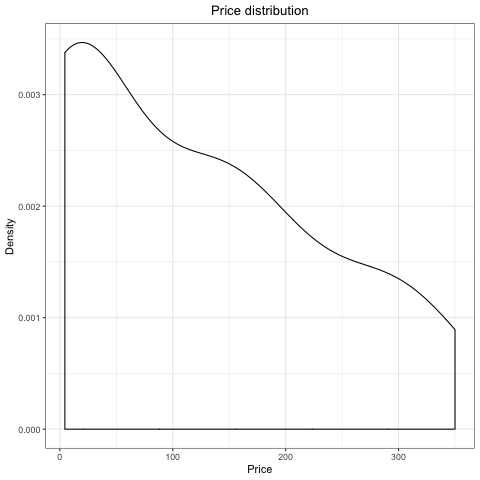

In [13]:
%%R -i products

#use ggplot to plot the distribution
library(ggplot2)
ggplot(products, aes(x=price)) + geom_density() + theme_bw() + labs(title = 'Price distribution', 
       x = 'Price', y = 'Density') + theme(plot.title = element_text(hjust = 0.5))

In [15]:
%%R

#save the plot
ggsave("price_histogram.png", width=6.5, height=3)

**Step 6:** Write a function called `filter_reviews` with one argument called `products` to find all the reviews that match the products which match the key phrase query. It should return a data frame with one review per row and three columns: `product.id`, `rating` (on the 5-star scale), and `review` (text).

In [11]:
def filter_reviews(key_phrase):
    data = {'product.id':[], 'rating':[],'review':[]}
    data_review = open('reviews.json')
    for line in data_review:
        if key_phrase in line:
            review_dict = demjson.decode(line)
            data['product.id'].append(review_dict['asin'])
            data['rating'].append(review_dict['overall'])
            data['review'].append(review_dict['reviewText'])
    df = pd.DataFrame(data)
    return df

In [12]:
#filter reviews by the produts of interest
reviews = filter_reviews('smartpen')
reviews

,product.id,rating,review
0,B001AALJ1I,5.0,Purchased these for my high-school aged son. T...
1,B001AALJ1I,5.0,The Livescribe Pulse Smartpen is one componen...
2,B001AALJ1I,5.0,I purchased these for my smartpen and they're ...
3,B001AALJ1I,4.0,I bought these first set of notebooks along wi...
4,B001AAOZU0,1.0,"I love my smartpen, but these pen refills are ..."
5,B001AAOZU0,3.0,"These refills work well enough, but ballpoints..."
6,B001AAOZU0,4.0,I love my Livescribe smartpen. I ordered these...
7,B001R4I74E,5.0,Just like all livescribe products I bought so ...
8,B001R4I74E,2.0,At first loved my smartpen (and didn't mind th...
9,B00264GKXO,3.0,The note pad pads them self work great with th...


**Step 7:** Summarize the reviews into a data frame called `review_summaries` with three columns: `product.id`, `count` for the number of reviews, and `ave.rating` for the mean rating.

In [16]:
reviews1 = reviews.groupby('product.id').size().reset_index(name='counts')
reviews2 = reviews.groupby('product.id').rating.mean().reset_index(name='ave.rating')
review_summaries = pd.merge(reviews1, reviews2, left_on='product.id', right_on='product.id', how='inner')
review_summaries

,product.id,counts,ave.rating
0,B000FMJLQC,1,2.000000
1,B001AALJ1I,4,4.750000
2,B001AALJ2M,2,5.000000
3,B001AALJ9U,3,1.666667
4,B001AAN4PW,10,4.000000
5,B001AAOZHI,4,4.750000
6,B001AAOZU0,3,2.666667
7,B001QR6FN2,1,2.000000
8,B001R4I74E,2,3.500000
9,B001R4KB66,1,5.000000


**Step 8:** Merge `review_summaries` with `products` on the `product.id` variable.

In [17]:
product_with_review = pd.merge(products, review_summaries, left_on='product.id', right_on='product.id', how='inner')
product_with_review

,product.id,price,counts,ave.rating
0,B001AAOZHI,289.99,4,4.750000
1,B001AAN4PW,289.99,10,4.000000
2,B001QR6FN2,117.57,1,2.000000
3,B001R4KB66,17.06,1,5.000000
4,B002DJTMSW,117.57,1,5.000000
5,B002DJV83Y,289.99,4,3.000000
6,B003RAE19Q,4.47,38,3.421053
7,B003RAPAKK,349.99,5,3.600000
8,B003TO56F8,25.49,2,3.000000
9,B003UNL14S,199.63,2,3.000000


**Step 9:** Plot a scatterplot of the review summaries with price on the x-axis, the average rating on the y axis, and the size of each point being the number of reviews. Add labels for the product ids, but fix the label size to be the same for all products.

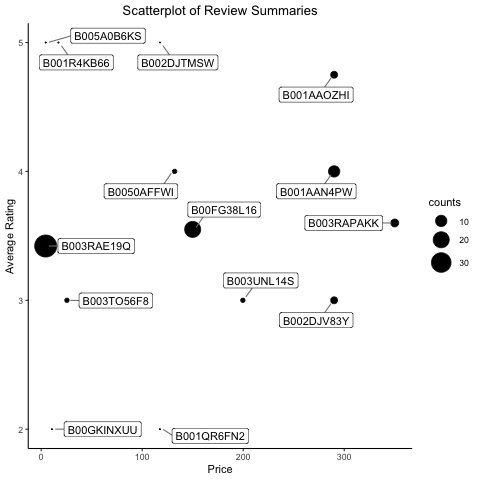

In [56]:
%%R -i product_with_review
library(ggplot2)
library(ggrepel)

review_plot = ggplot(product_with_review, aes(x=price, y=ave.rating))
reviews_summary = review_plot + geom_point(aes(size = counts)) + 
  geom_label_repel(aes(label = product.id), box.padding = 0.35, point.padding = 0.5,
                   segment.color = 'grey50') + theme_classic() +
  labs(title = 'Scatterplot of Review Summaries', 
       x = 'Price', y = 'Average Rating') + 
  scale_size_continuous(range = c(0.1,10)) + 
  theme(plot.title = element_text(hjust = 0.5))
reviews_summary

In [57]:
%%R

#save the plot
ggsave("reviews_summary.png", width=6.5, height=4)

**Step 10:** Write function `filter_products_by_id` that takes in a product identifier argument `idx` and returns returns the matching product information from `products.json`.

In [23]:
def filter_products_by_id(idx):
    data = {'product.id':[], 'rating':[],'review':[]}
    data_review = open('reviews.json')
    for line in data_review:
        if idx in line:
            review_dict = demjson.decode(line)
            data['product.id'].append(review_dict['asin'])
            data['rating'].append(review_dict['overall'])
            data['review'].append(review_dict['reviewText'])
    df = pd.DataFrame(data)
    return df

**Step 11:** Using the plot from Step 9, the `filter_products_by_id` function, and the `review_summaries` data frame, identify 3 competitor products in different price ranges and extract the relevant information.

In [25]:
low_price = filter_products_by_id('B003RAE19Q')
mid_price = filter_products_by_id('B00FG38L16')
high_price = filter_products_by_id('B001AAN4PW')

In [33]:
high_price

,product.id,rating,review
0,B001AAN4PW,5.0,I picked this up for the wife as I have one al...
1,B001AAN4PW,5.0,So I've been using my Pulse for about six mont...
2,B001AAN4PW,5.0,For college students unable or unwilling to lu...
3,B001AAN4PW,1.0,Please be advised that items from Livescribe h...
4,B001AAN4PW,2.0,When I run the desktop manager on my windows v...
5,B001AAN4PW,5.0,I use it primarily for recording critical meet...
6,B001AAN4PW,4.0,I've used the pen now for six weeks. The pen i...
7,B001AAN4PW,5.0,I love this pen. I started using it immediate...
8,B001AAN4PW,5.0,I got this as soon as it came out this summer ...
9,B001AAN4PW,5.0,I highly recommend this pen to any student! Yo...


In [26]:
mid_price

,product.id,rating,review
0,B00FG38L16,1.0,I bought this pen and it arrived today. Unfort...
1,B00FG38L16,2.0,I've never been a big fan of the Livescribe sm...
2,B00FG38L16,4.0,The Livescribe 3 has its problems and limitati...
3,B00FG38L16,4.0,and then I used the writing-to-text conversion...
4,B00FG38L16,4.0,How does it work? That's the one thing I wante...
5,B00FG38L16,3.0,I'm on my 3rd Livescribe pen. While a touch l...
6,B00FG38L16,4.0,"I would give it 3.5 stars if I could, but am r..."
7,B00FG38L16,5.0,This is a review of the Livescribe 3 Smartpen ...
8,B00FG38L16,3.0,Maybe I did not read the product details as we...
9,B00FG38L16,2.0,I own both the Echo and Wifi and I loved them....


In [37]:
low_price

,product.id,rating,review
0,B003RAE19Q,4.0,I was skeptical that this pen would perform as...
1,B003RAE19Q,1.0,-the voice is not clear at all .- battrey has ...
2,B003RAE19Q,3.0,I was considering Livescribe a couple of years...
3,B003RAE19Q,1.0,I purchased my ECHO about a month ago and it h...
4,B003RAE19Q,3.0,I received my pen from Amazon earlier last mon...
5,B003RAE19Q,5.0,Exceeds my expectations! Records my class whi...
6,B003RAE19Q,5.0,You'll love this thing! I write and it transf...
7,B003RAE19Q,4.0,If you're wondering if this pen works as well ...
8,B003RAE19Q,4.0,I bought this product because i like this in m...
9,B003RAE19Q,2.0,I have an Echo 8GB which I was very happy with...


In [ ]:
#save the dataframe for further investigation
high_price.to_csv(r'C:\Users\xuebi\Desktop\high_product.csv')
mid_price.to_csv(r'C:\Users\xuebi\Desktop\mid_price.csv')
low_price.to_csv(r'C:\Users\xuebi\Desktop\low_price.csv')